## 비지도학습

- 알고리즘에 주입하는 훈련 데이터(train data)에 아무것도 포함시키지 않고 학습하는 것

#### 군집 
- 군집이란 데이터를 클러스터로 나누어 같은 클러스터 안의 속성이 다른 클러스터들의 속성보다 더 비슷해지도록 데이터에 있는 자연스러운 그룹을 찾는 과정이다(블로그 방문자 통계)  

#### 시각화 
- 레이블이 없는 고차원 데이터들을 집어 넣어 도식화가 가능한 2d나 3d 형태로 표현  

####  차원 축소 
- 상관관계가 있는 여러 특성을 하나로 합쳐 데이터를 간소화

#### 이상치 탐지
- 학습 알고리즘을 주입하기 전에 데이터셋에서 이상한 값을 자동으로 제거하는 것(제조 결함, 부정 신용카드 거래 감지)

#### 특이치 탐지 
- 모든 샘플과 달라 보이는 새로운 샘플을 탐지하는 것 -> 알고리즘으로 감지하고 싶은 모든 샘플을 제거한 매우 깨끗한 훈련세트 필요

#### 연관규칙 학습   
- 대량의 데이터 내에서 feature간에 새로운 연관성을 찾아내는 것(쇼핑몰 고객 경향성 분석)

#### 비지도 학습 알고리즘 종류
- k-means,DBSCAN,계층군집 분석(HCA),이상치 탐지와 특이치 탐지, 원-클래스,주성분 분석(PCA),커널 PCA,어프라이어리,이클렛

In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [15]:
fruits = np.load('./fruits_300.npy')

In [16]:
# 첫번쨰 차원: 샘플의 개수(300)
# 두번쨰,세번쨰 차원:이미지 높이, 너비
# 이미지크기 :100x100 --> 배열의 크기 100x100
print(fruits.shape)

(300, 100, 100)


In [17]:
# 첫 번째 이미지의 첫 번쨰 행을 모두 선택
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


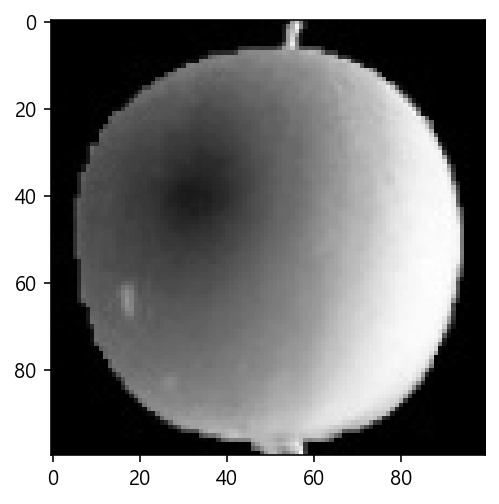

In [18]:
plt.imshow(fruits[0],cmap='gray')

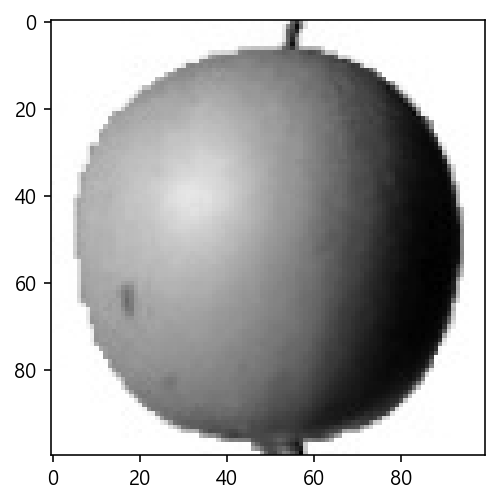

In [19]:
plt.imshow(fruits[0],cmap='gray_r')

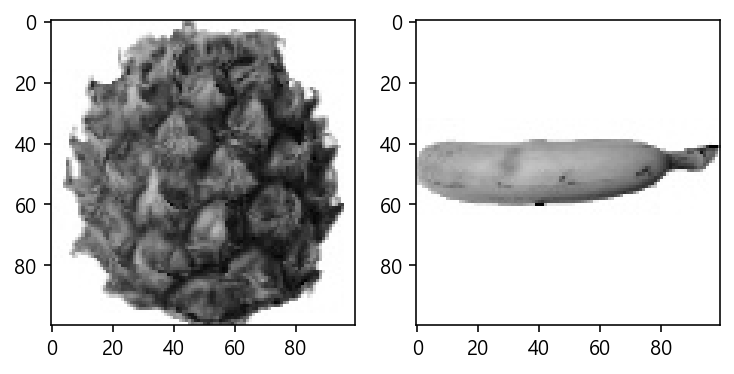

In [20]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [21]:
# 과일 종류에 따라 이미지나눔
#reshape()-> 차원 축소(2차원 ->1차원)
apple = fruits[0:100].reshape(-1, 100*100)
pineapple=fruits[100:200].reshape(-1, 100*100)
banana=fruits[200:300].reshape(-1, 100*100)

In [22]:
print(apple.shape)

(100, 10000)


In [23]:
# 사과 이미지 열의 평균(픽셀값 평균)
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


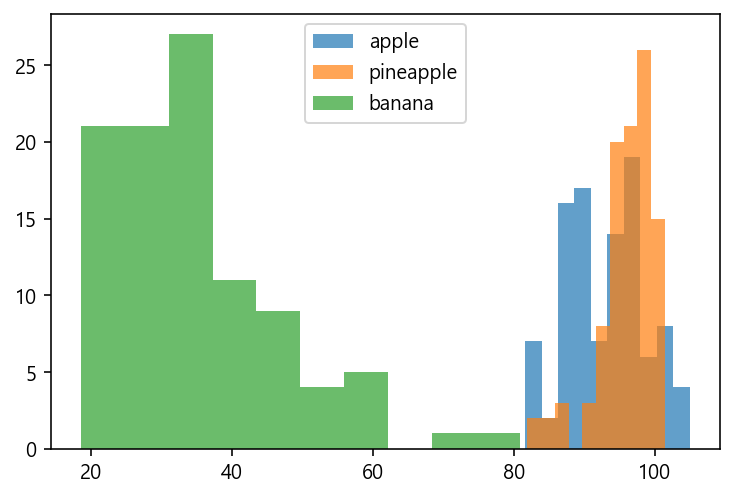

In [24]:
#histogram: 분포 확인
#alpha =투명도 조절
#바나나는 사진에서 차지하는 영역이 적기 때문에 평균값이 낮음
plt.hist(apple.mean(axis=1),alpha=0.7)
plt.hist(pineapple.mean(axis=1),alpha=0.7)
plt.hist(banana.mean(axis=1),alpha=0.7)
plt.legend(['apple','pineapple','banana'])

In [25]:
# 전체 샘플에 대한 픽셀의 평균
fig, axs = plt.subplots(1,3,figsize=(18,6))
axs[0].bar(range(10000),np.mean(apple, axis=0))
axs[1].bar(range(10000),np.mean(pineapple, axis=0))
axs[2].bar(range(10000),np.mean(banana, axis=0))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000166FFF67820> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()


In [ ]:
## 픽셀을 평균값으로한 과일 이미지들을 출력
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple,axis=0).reshape(100,100)
banana_mean=np.mean(banana,axis=0).reshape(100,100)

fig, axs = plt.subplots(1,3,figsize=(15,7))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

In [ ]:
## 절댓값 오차(mae)를 사용 평균값과 가장 가까운 사진 고르기
## 각 샘플에 대한 평균을 구하기 때문에 행과 열 모두 지정
abs_diff = np.abs(fruits-apple_mean)
abs_mean = np.mean(abs_diff,axis=(1,2))
print(abs_mean)

In [ ]:
apple_index =np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [ ]:
apple_index =np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i+j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [ ]:
abs_diff = np.abs(fruits-banana_mean)
abs_mean = np.mean(abs_diff,axis=(1,2))
print(abs_mean.shape)
banana_index =np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i+j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [ ]:
abs_diff = np.abs(fruits-pineapple_mean)
abs_mean = np.mean(abs_diff,axis=(1,2))
print(abs_mean)

pineapple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

## K-means 알고리즘

![kmean](https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png)

- k-means 알고리즘에서 k는 묶을 군집(클러스터)의 개수를 의미하고 means는 평균을 의미한다. 즉, 각 군집의 평균(mean)을 활용해 k개로 묶는다는 의미인데 여기서 평균이란 각 클러스터의 중심(centroid)과 데이터들의 평균 거리를 의미한다.

- k-means 알고리즘은 프로토타입 기반 군집에 속하는데 프로토타입 기반 군집이란 각 클러스터가 하나의 프로토타입으로 표현된다는 뜻이다. 프로토타입은 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드(평균), 범주형 특성에서는 메도이드(가장 대표되는 포인트나 가장 자주 등장하는 포인트)가 된다. 

- k-means 알고리즘은 클러스터를 구분하는데 뛰어나지만 사전에 클러스터 개수 k를 지정해야 하는 단점이 있다. 만약 적절하지 않은 k를 고르면 군집 성능이 나쁘지 때문에 엘보우 방법(elbow method)과 실루엣 기법(shlhouette plot)를 활용해 k 값을 결정한다.

#### k-means 알고리즘 실행 과정

1. 무작위로 k개의 클러스터 중심을 정한다
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.

#### 엘보우 방법(Elbow Method)

![elbow](https://www.researchgate.net/publication/339823520/figure/fig3/AS:867521741733888@1583844709013/The-elbow-method-of-k-means.png)

- 이너셔(클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타낸 값,sse)값의 변화를 클러스터를 늘려가면서 관찰해 최적의 클러스터의 개수(K값)를 찾는 방법

- 그래프에서 이너셔값이 급격한 경사도를 보이다가 완만한 경사를 보이는 부분(팔꿈치)에 해당하는 클러스터 번호를 k값으로 설정함

#### 실루엣 기법(shlhouette plot)

![sp](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)

- 클러스터 내부의 샘플들이 얼마나 조밀하게 모여 있는지 측정하는 그래프 도구
- 데이터셋 샘플 하나에 대한 실루엣 계수를 계산하기 위해 다음 과정을 적용
  1. 샘플 x와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균해 클러스터 응집력 a를 계산
  2. 샘플 x와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 클러스터 분리력 b를 계산
  3. 클러스터 응집력과 분리도 사이의 차ㄹ이를 둘 중 큰 값으로 나누어 실루엣 s를 다음과 같이 계산함    
![sc](https://t1.daumcdn.net/cfile/tistory/99BC644B5F4346CA10)
  
- 실루엣 계수는 -1과 1사이의 값을 가진다.
- 클러스터 응집력과 클러스터 분리도가 같으면(b=a) 실루엣 계수는 0이 된다
- 클러스터 분리도가 클러스터 응집력보다 클수록(b>>a) 이상적인 실루엣 계수 1에 가깝게 되는데 분리도(b)는 샘플이 다른 클러스터와 얼마나 다른지 나타내고, 응집력(a)는 클러스터와 얼마나 비슷한지 나타내기 때문이다.

In [27]:
fruits= np.load('fruits_300.npy')
fruits2d=fruits.reshape(-1,100*100)

In [28]:
from sklearn.cluster import KMeans

In [29]:
## 비지도 학습이므로 fit할 때 타깃값을 넣지 않는다a
km =KMeans(n_clusters=3,random_state=42)
km.fit(fruits2d)

KMeans(n_clusters=3, random_state=42)

In [30]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [31]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


In [32]:
def draw_fruits(arr,ratio=1):
    n=len(arr)
    rows=int(np.ceil(n/10))
    cols = n if rows<2 else 10
    fig,axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:
                axs[i,j].imshow(arr[i+j],cmap='gray_r')
                axs[i,j].axis('off')
plt.show()

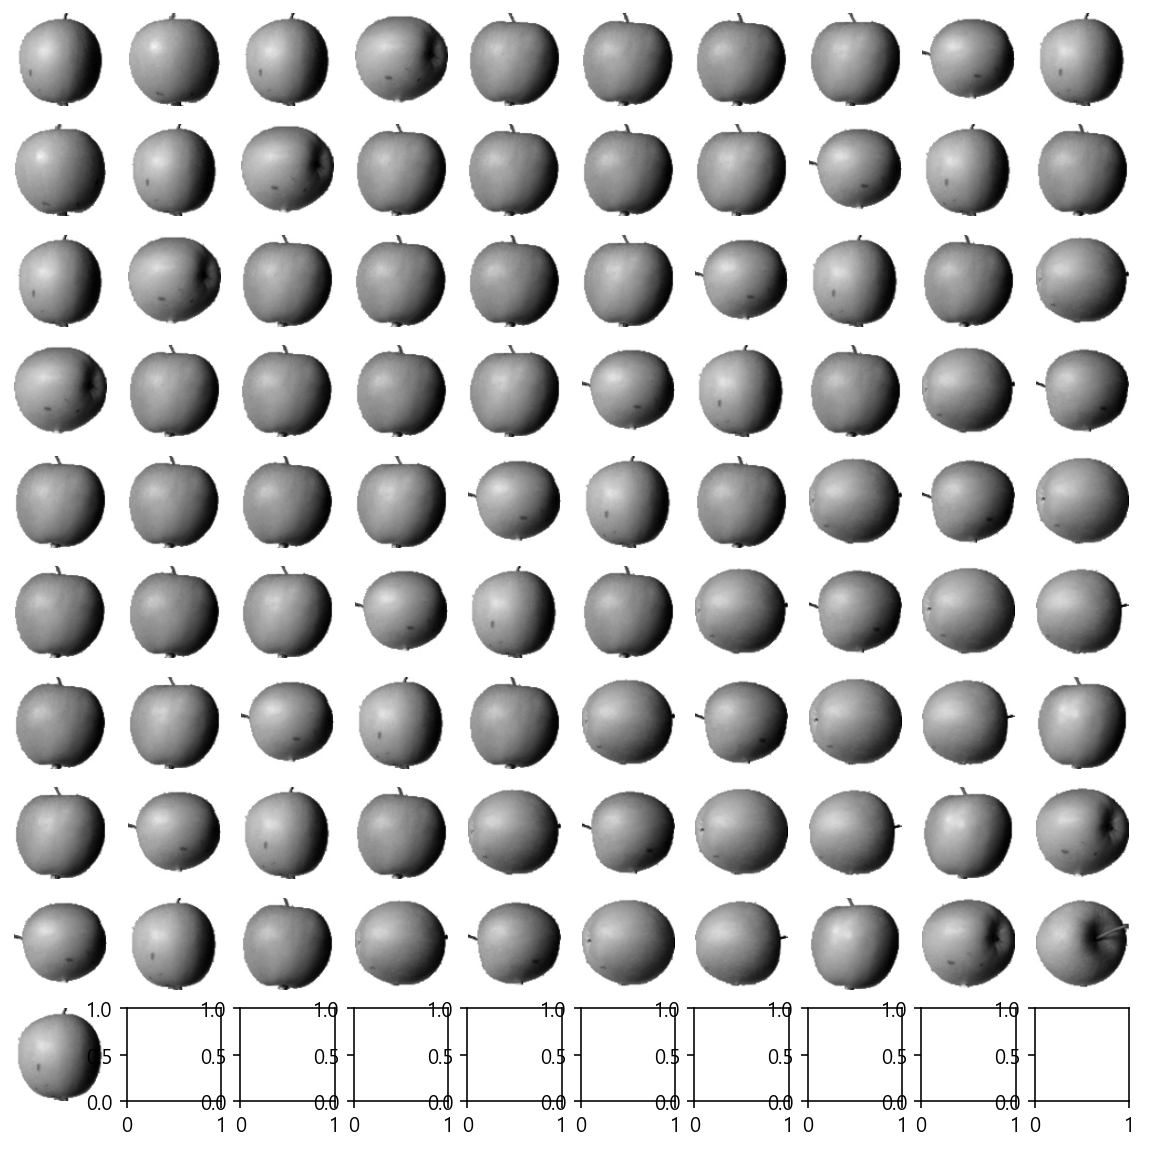

In [33]:
draw_fruits(fruits[km.labels_==0])

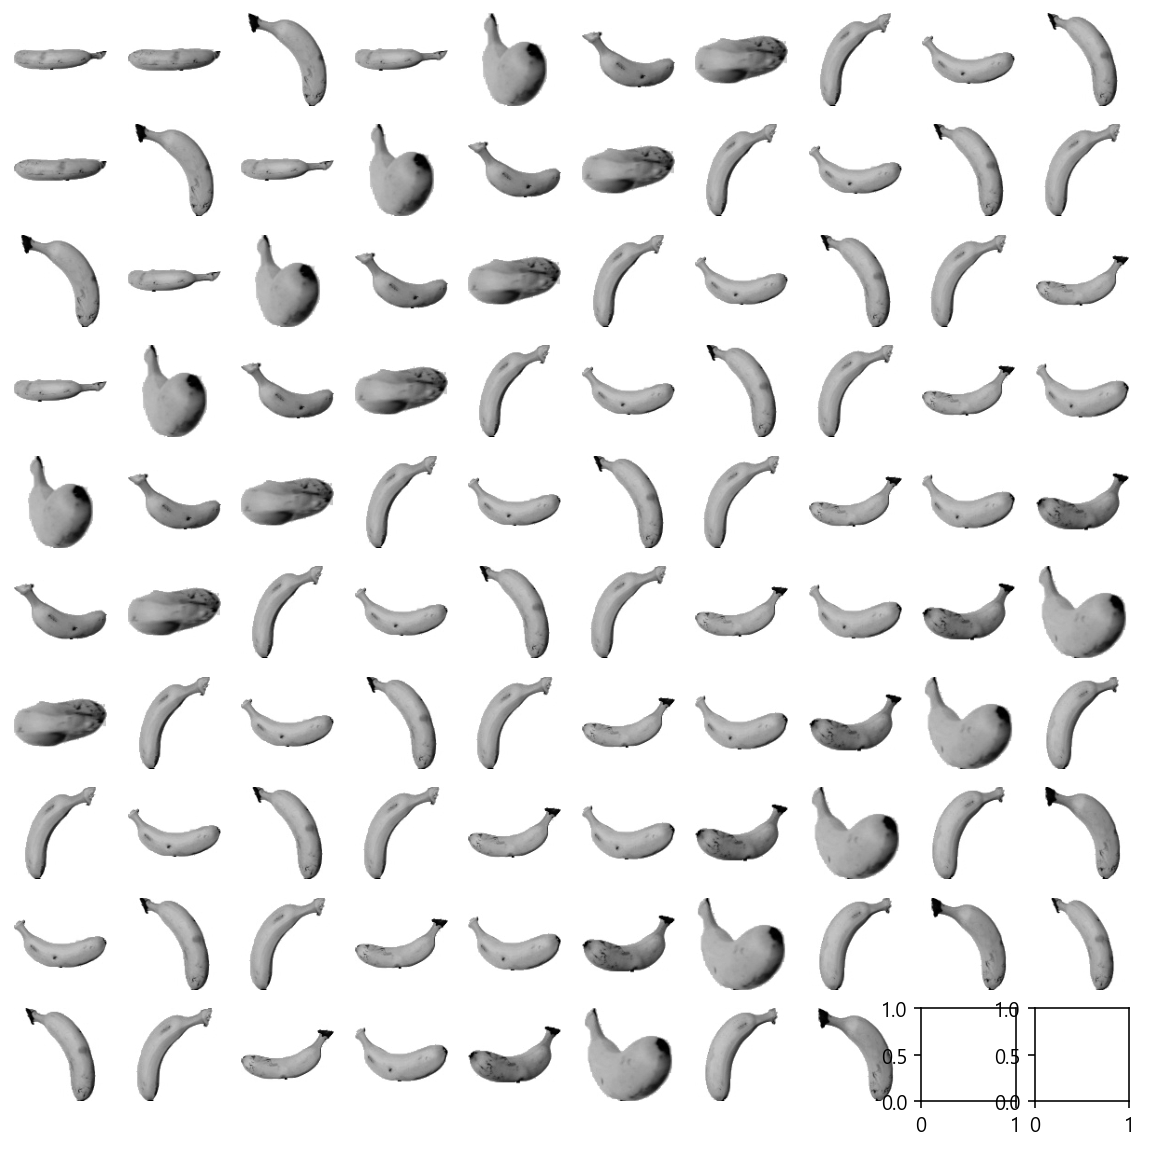

In [34]:
draw_fruits(fruits[km.labels_==1])

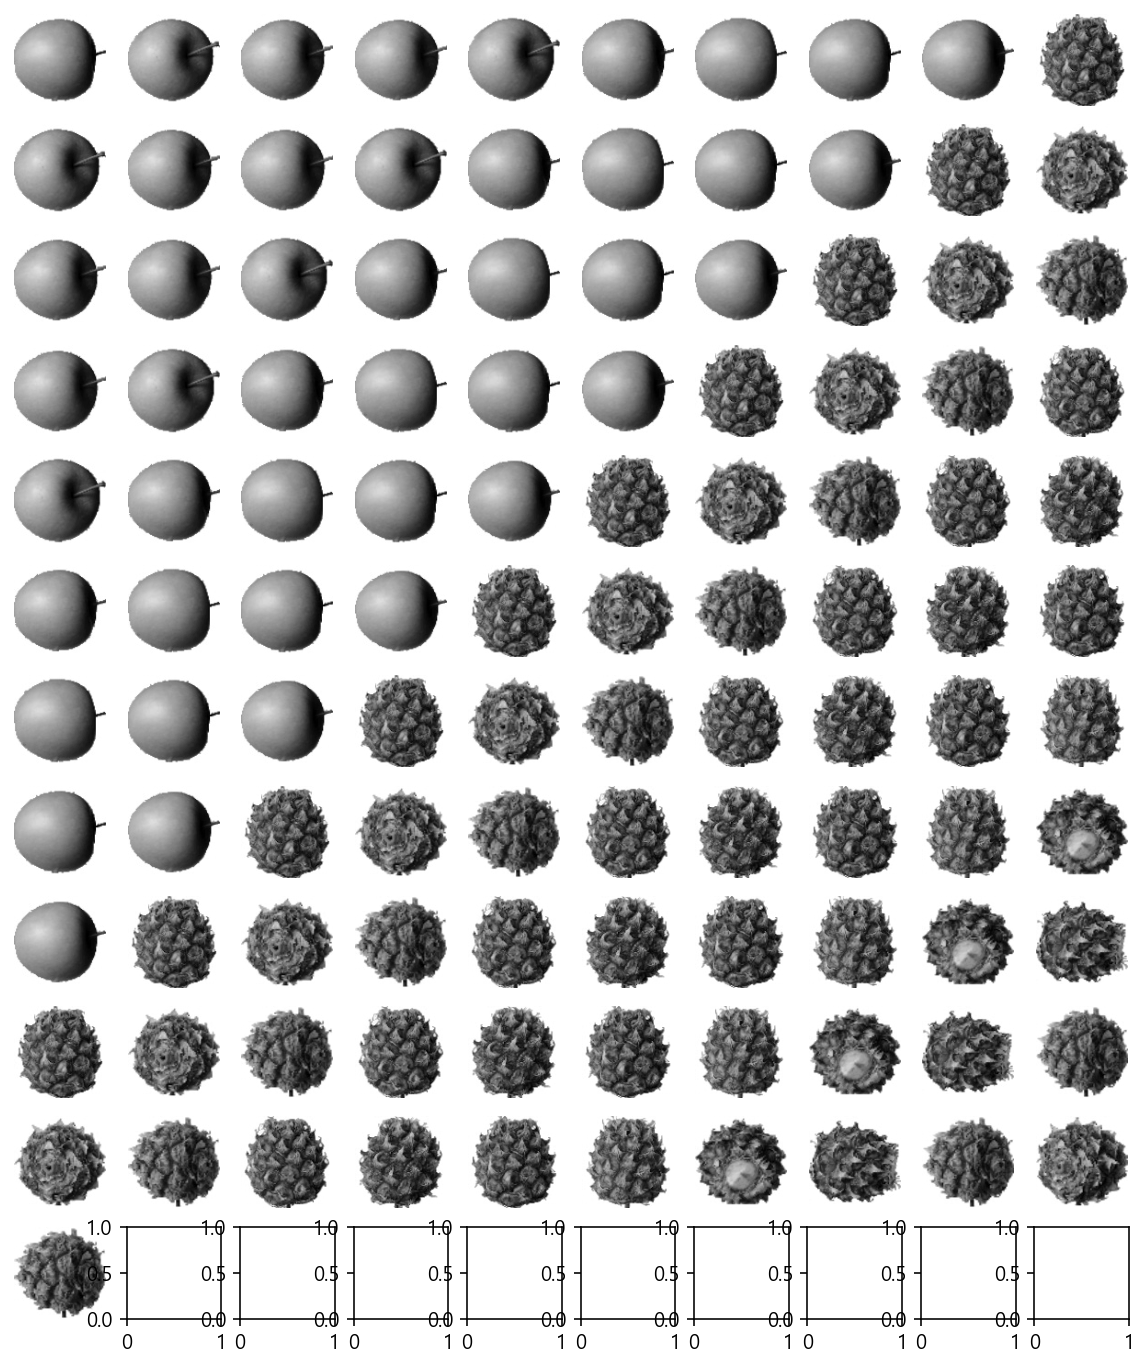

In [35]:
draw_fruits(fruits[km.labels_==2])

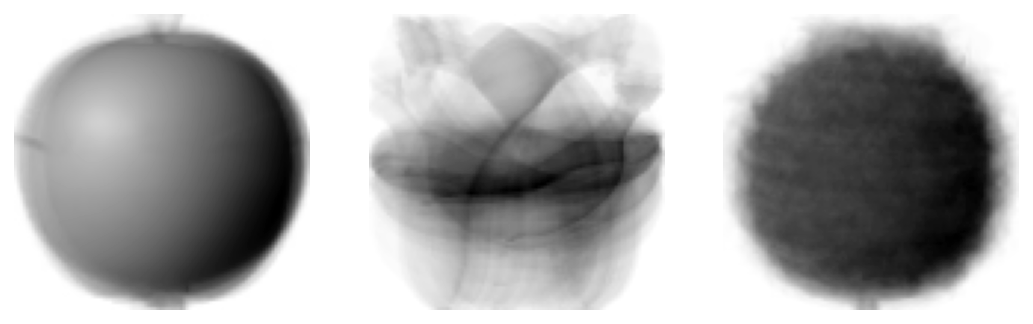

In [36]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [37]:
print(km.predict(fruits2d[100:109]))

[2 2 2 2 2 2 2 2 2]


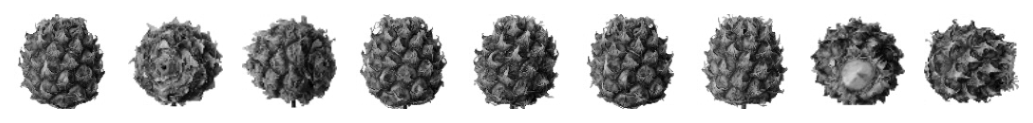

In [38]:
draw_fruits(fruits[100:109])

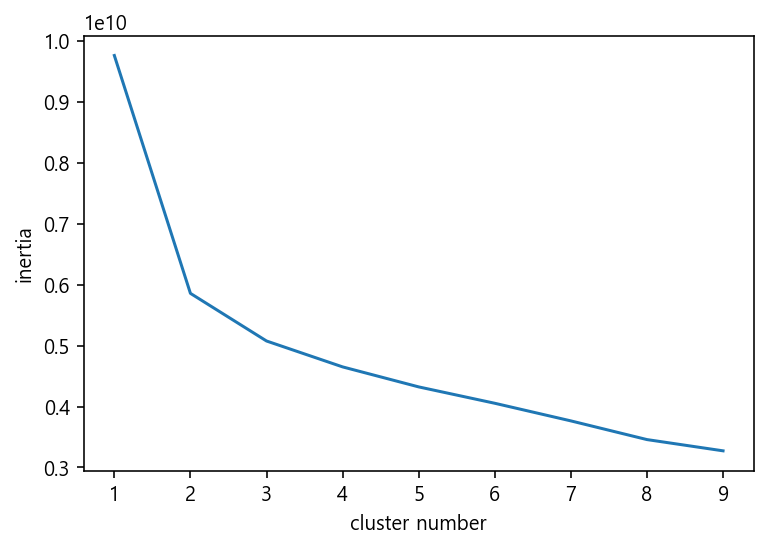

In [39]:
inertia = []
for k in range(1,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(fruits2d)
    inertia.append(km.inertia_)
plt.plot(range(1,10),inertia)
plt.xlabel('cluster number')
plt.ylabel('inertia')
plt.show()

## 차원 축소

- 고차원의 데이터가 주어진 경우 머신 러닝 알고리즘의 계산 성능과 저장 공간의 한계를 고려해 관련 있는 데이터를 대부분 유지하면서 더 작은 차언의 부분 공간으로 데이터를 압축하는 것

## 차원의 저주

- 한 샘플을 특정짓기 위해 많은 정보(다양한 차원의)를 수집할수록 오히려 학습이 어려워짐을 말한다.

- 고차원 공간에서는 가장 가까운 feature여도 좋은 추정 값을 만들기에는 너무 멀리 떨어져 있다는 뜻

#### 변수추출(feature extraction)

- 기존 변수를 조합해 새로운 변수를 만드는 기법

#### 변수선택(feature selction)

- 기존 변수 가운데 일부만 활용하는 방식

## 주성분 분석(PCA)

![pca](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbtsi0E%2FbtqLW9xNcWw%2FKe5W0eur5XspzF0kLZk6Xk%2Fimg.png)

- PCA는 차원 축소 알고리즘 중 하나로 분산이 최대가 되도록 하는 축을 찾고, 그 축과 직교하면서 분산이 최대가 되도록 하는 축을 이어 찾아나가는 방식으로 데이터를 간단히 표현한다. 
- 이 과정에서 차원이 축소되며, 투영 변환(3차원 공간에 있는 점을 2차원 평면으로 변환)을 반대로 수행하면 데이터의 변환이 가능하고, PCA로 찾은 축들 중 분산이 적은 축들을 제거함으로써 노이즈를 줄일 수 있다. 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits2d)

In [ ]:
print(pca.components_.shape)

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits2d.shape)

In [ ]:
## pca를 사용해 10000개의 데이터 차원을 30으로 줄임
fruits_pca=pca.transform(fruits2d)
print(fruits_pca.shape)

In [ ]:
## inverse_transform() --> 차원을 복구
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

In [ ]:
fruit_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruit_reconstruct[start:start+100])
    print('\n')

In [ ]:
## 설명 분산: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
## 첫 번째 성분의 설명 분산이 가장 크다
print(np.sum(pca.explained_variance_ratio_))

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits2d,target)

In [ ]:
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits2d)

In [ ]:
print(pca.n_components_)

In [ ]:
fruits_pca=pca.transform(fruits2d)

In [ ]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [ ]:
from sklearn.cluster import Kmeans
km = Kmeans(n_cluster=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()